In [ ]:
import tarfile
file = tarfile.open('/content/drive/MyDrive/MNIST_DATASET.tar.xz')
file.extractall('./MNIST_DATASET')
file.close()

In [ ]:
import gdown
import os

url = "https://drive.google.com/uc?export=download&id=1Au3D-cVVAFV0keDJBzP_MHmj23zEtLgo"
output = "MNIST_DATASET.tar.xz"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Au3D-cVVAFV0keDJBzP_MHmj23zEtLgo
To: /content/MNIST_DATASET.tar.xz
100%|██████████| 16.5M/16.5M [00:00<00:00, 17.2MB/s]


'MNIST_DATASET.tar.xz'

In [ ]:
import tarfile

file = tarfile.open('/content/MNIST_DATASET.tar.xz')
file.extractall()

file.close()

Q1.Download the MNIST dataset (provide code to download in google colab) and create a custom dataloader using
torch.utils.data.Dataset, DataLoader. Write another dataloader completely from scratch and compare the
loading performance of your scratch implemented data loader with the one written with PyTorch classes across
different batch sizes (128, 256, 512, 1024). Plot a graph illustrating the relationship between batch size and
loading time.


Batch Size: 128
PyTorch DataLoader Loading Time: 0.0106 seconds
Scratch DataLoader Loading Time: 0.0319 seconds

Batch Size: 256
PyTorch DataLoader Loading Time: 0.0249 seconds
Scratch DataLoader Loading Time: 0.0433 seconds

Batch Size: 512
PyTorch DataLoader Loading Time: 0.0401 seconds
Scratch DataLoader Loading Time: 0.0705 seconds

Batch Size: 1024
PyTorch DataLoader Loading Time: 0.0857 seconds
Scratch DataLoader Loading Time: 0.1129 seconds


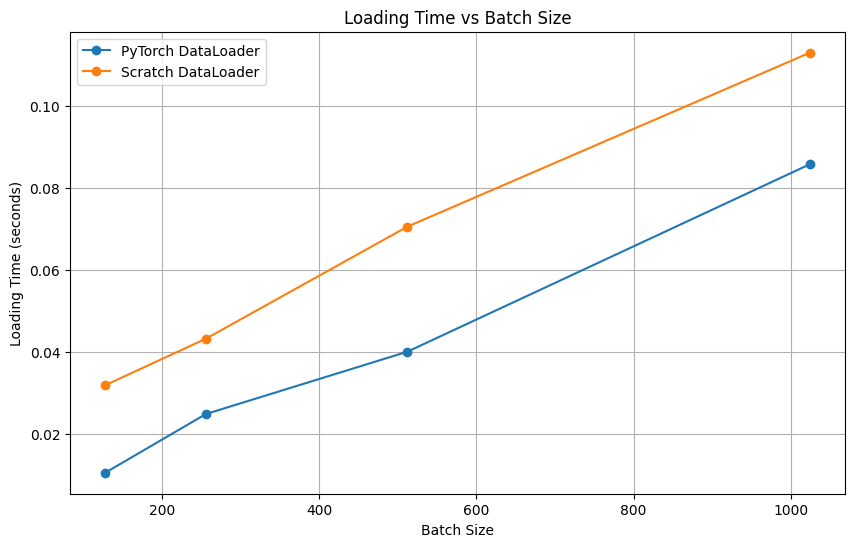

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0196,
         0.0000, 0.0431, 0.0000, 0.0471, 0.0000, 0.0275, 0.0275, 0.0000, 0.0118,
         0.0157, 0.0000, 0.0000, 0.0118, 0.0392, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0196, 0.0000, 0.0157, 0.0157, 0.0157, 0.0000, 0.0000, 0.0078,
         0.0000, 0.0000, 0.0353, 0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0235, 0.0000, 0.0000, 0.0000, 0.0118, 0.0510, 0.0157,
         0.0000, 0.0275, 0.0706, 0.0000, 0.0000, 0.0902, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0235,
         0.0235, 0.0235, 0.0000, 0.0000, 0.0000, 0.0118, 0.0314, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0431, 0.0392, 0.0000

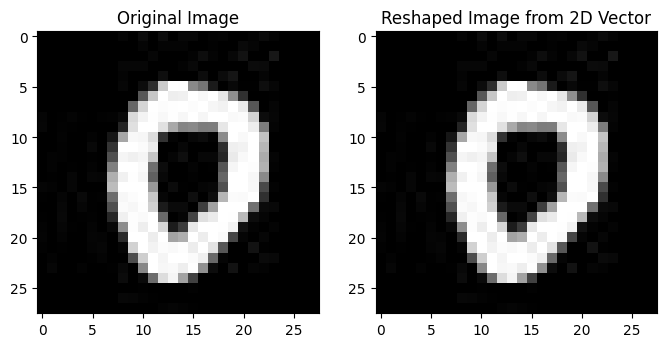

In [ ]:
import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import random
import time
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self):
        self.imgs_path = "/content/MNIST_DATASET/MNIST_DATASET/trainingSet/trainingSet"
        file_list = glob.glob(self.imgs_path + "/*")
        self.data = []
        for class_path in file_list:
            class_name = class_path.split("/")[-1]
            for img_path in glob.glob(class_path + "/*.jpg"):
                self.data.append([img_path, class_name])
        self.img_dim = (28,28)
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.img_dim)
        class_id = int(class_name)
        img_tensor = torch.from_numpy(img)
        img_tensor = img_tensor.unsqueeze(0)/255
        class_id = torch.tensor([class_id])
        return img_tensor, class_id


class ScratchDataLoader:
    def __init__(self, dataset, batch_size, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle

    def __iter__(self):
        self.idx_list = list(range(len(self.dataset)))
        if self.shuffle:
            random.shuffle(self.idx_list)
        self.batch_start_idx = 0
        return self

    def __next__(self):
        if self.batch_start_idx < len(self.dataset):
            batch_end_idx = min(self.batch_start_idx + self.batch_size, len(self.dataset))
            batch_indices = self.idx_list[self.batch_start_idx:batch_end_idx]
            batch_images = []
            batch_labels = []
            for idx in batch_indices:
                image, label = self.dataset[idx]
                batch_images.append(image)
                batch_labels.append(label)
            self.batch_start_idx = batch_end_idx
            return torch.stack(batch_images), torch.stack(batch_labels)
        else:
            raise StopIteration

# Create a CustomDataset instance
custom_dataset = CustomDataset()

def measure_loading_time(dataloader):
    start_time = time.time()
    for _ in dataloader:
        break
    end_time = time.time()
    return end_time - start_time

# Batch sizes to compare
batch_sizes = [128, 256, 512, 1024]

# Lists to store loading times
pytorch_loading_times = []
scratch_loading_times = []

# Iterate over batch sizes
for batch_size in batch_sizes:
    print(f"\nBatch Size: {batch_size}")

    # PyTorch DataLoader
    torch_dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)
    torch_loading_time = measure_loading_time(torch_dataloader)
    print(f"PyTorch DataLoader Loading Time: {torch_loading_time:.4f} seconds")
    pytorch_loading_times.append(torch_loading_time)

    # Scratch DataLoader
    scratch_dataloader = ScratchDataLoader(dataset=custom_dataset, batch_size=batch_size, shuffle=True)
    scratch_loading_time = measure_loading_time(scratch_dataloader)
    print(f"Scratch DataLoader Loading Time: {scratch_loading_time:.4f} seconds")
    scratch_loading_times.append(scratch_loading_time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, pytorch_loading_times, marker='o', label='PyTorch DataLoader')
plt.plot(batch_sizes, scratch_loading_times, marker='o', label='Scratch DataLoader')
plt.title('Loading Time vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Loading Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

scratch_dataloader = ScratchDataLoader(dataset=custom_dataset, batch_size=128, shuffle=True)

# Extract a sample from the DataLoader
sample_images, sample_labels = next(iter(scratch_dataloader))

# Reshape the flattened 1D vector to the original image shape (assuming the image was originally (28, 28))
sample_image_reshaped = sample_images[0].view(28, 28)
print(sample_image_reshaped)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_images[0].numpy().reshape(28, 28), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sample_image_reshaped.numpy(), cmap='gray')
plt.title('Reshaped Image from 2D Vector')

plt.show()

Q2. Implement a Feed-Forward neural network architecture using torh.nn.Linear featuring four hidden layers, each
comprising minimum 32 neurons (excluding input and output layers). Train the model using the most effective
data loader identified in the previous question with ReLU activation function. Employ the Cross-Entropy
loss function and opt for the Stochastic Gradient Descent (SGD) optimizer with default parameters, setting
the learning rate to 0.0003. Plot graphs depicting the loss and accuracy during training, validation and testing
for a total of 60 epochs. For this question you can use whatever PyTorch has to offer.

Epoch 1, Train Loss: 2.3188, Train Acc: 11.0923, Val Loss: 2.2799, Val Acc: 12.0714, Test Loss: 2.2831, Test Acc: 12.5952
Epoch 2, Train Loss: 2.2530, Train Acc: 14.0506, Val Loss: 2.2227, Val Acc: 16.0952, Test Loss: 2.2278, Test Acc: 15.5714
Epoch 3, Train Loss: 2.2005, Train Acc: 17.2024, Val Loss: 2.1722, Val Acc: 19.5476, Test Loss: 2.1793, Test Acc: 18.0476
Epoch 4, Train Loss: 2.1517, Train Acc: 20.3750, Val Loss: 2.1231, Val Acc: 22.6667, Test Loss: 2.1323, Test Acc: 20.9048
Epoch 5, Train Loss: 2.1024, Train Acc: 24.1190, Val Loss: 2.0712, Val Acc: 27.0714, Test Loss: 2.0826, Test Acc: 25.7619
Epoch 6, Train Loss: 2.0489, Train Acc: 29.0565, Val Loss: 2.0141, Val Acc: 32.8333, Test Loss: 2.0280, Test Acc: 31.3095
Epoch 7, Train Loss: 1.9893, Train Acc: 34.8899, Val Loss: 1.9518, Val Acc: 37.1905, Test Loss: 1.9674, Test Acc: 36.8810
Epoch 8, Train Loss: 1.9242, Train Acc: 39.7381, Val Loss: 1.8848, Val Acc: 42.2381, Test Loss: 1.9011, Test Acc: 40.9524
Epoch 9, Train Loss: 1.8

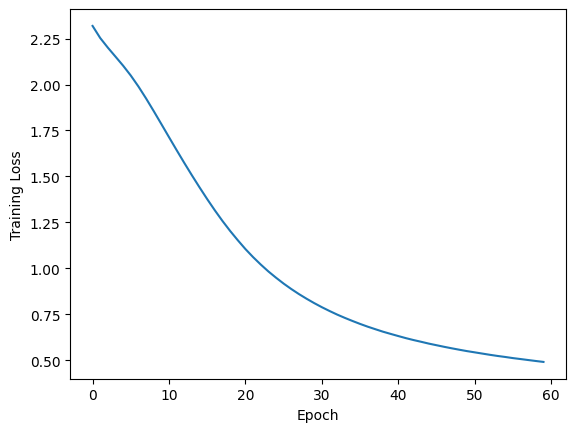

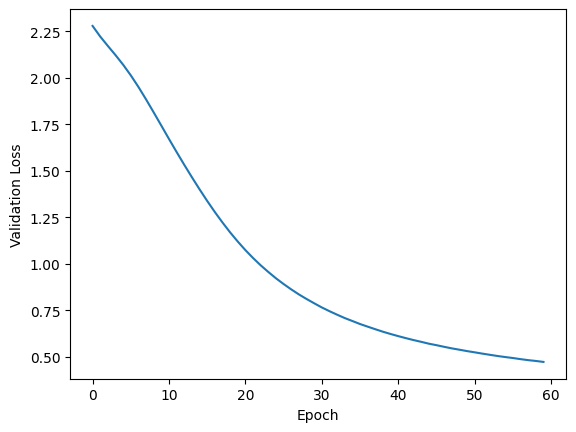

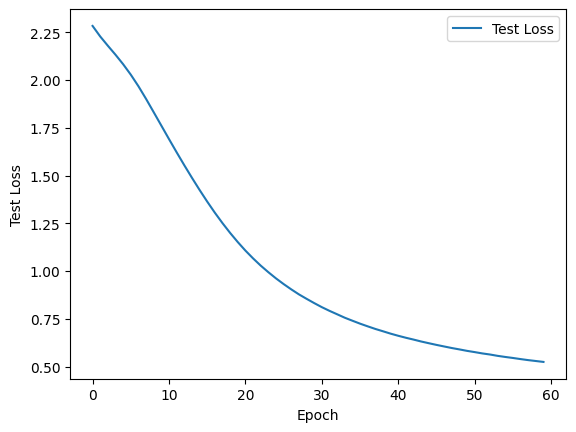

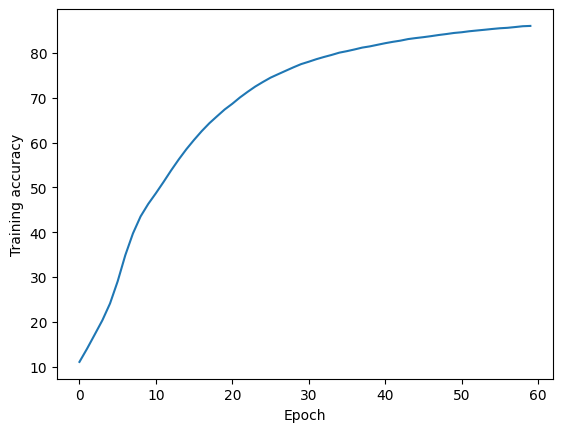

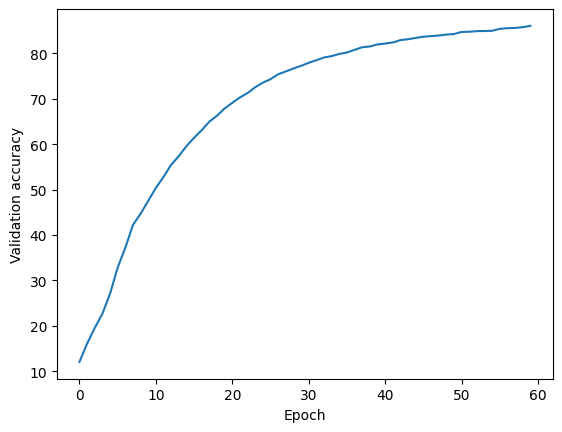

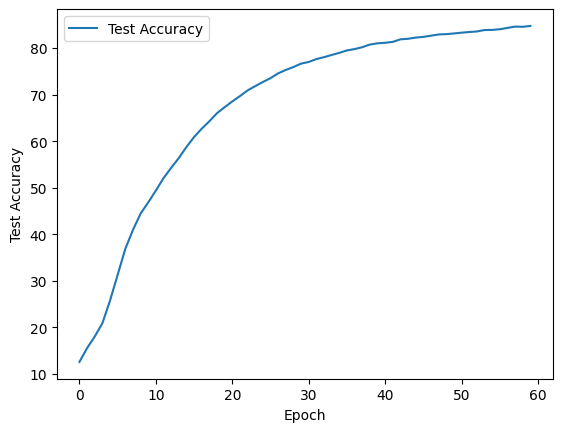

In [ ]:
#Q2 with ReLU Actuvation function
import torch,os
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import glob,cv2,math
import torch.nn.functional as F

class CustomDataset(Dataset):
    def __init__(self):
        self.imgs_path = "/content/MNIST_DATASET/MNIST_DATASET/trainingSet/trainingSet"
        file_list = glob.glob(os.path.join(self.imgs_path, "*", "*.jpg"))
        self.data = []
        for img_path in file_list:
            class_name = os.path.basename(os.path.dirname(img_path))
            self.data.append([img_path, int(class_name)])
        self.img_dim = (28, 28)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, class_id = self.data[idx]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.img_dim)
        img_tensor = torch.from_numpy(img).float()
        img_tensor = img_tensor.unsqueeze(0)
        class_id = torch.tensor(class_id, dtype=torch.long)
        return img_tensor, class_id
class FeedForwardNet(nn.Module):
    def __init__(self):
        super(FeedForwardNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 10)
        for layer in [self.fc1, self.fc2, self.fc3, self.fc4, self.fc5]:
            nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
            # n = layer.weight.size(1)
            # bound = math.sqrt(2 / n)
            # nn.init.normal_(layer.weight, mean=0, std=bound)
            # nn.init.zeros_(layer.bias)
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

full_dataset = CustomDataset()
train_size = int(0.8 * len(full_dataset))  # Use 70% for training
test_val_size = len(full_dataset) - train_size
test_size = int(0.5 * test_val_size)  # Split the remaining 30% equally for test and validation
val_size = test_val_size - test_size

train_dataset, test_val_dataset = random_split(full_dataset, [train_size, test_val_size])
test_dataset, val_dataset = random_split(test_val_dataset, [test_size, val_size])

# Create DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
net = FeedForwardNet()

# Define the Cross-Entropy loss
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.0003)

epochs = 60
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
test_losses, test_accuracies = [], []

for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data in train_loader:
        inputs, labels = data
        inputs = inputs.float() / 255.0  # Normalize the input
        labels = labels.squeeze()  # Remove extra dimension from labels

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    # Validation loop
    net.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for data_val in val_loader:
            inputs_val, labels_val = data_val
            inputs_val = inputs_val.float() / 255.0  # Normalize the input
            labels_val = labels_val.squeeze()  # Remove extra dimension from labels

            outputs_val = net(inputs_val)
            loss_val = criterion(outputs_val, labels_val)
            val_loss += loss_val.item()
            _, predicted_val = torch.max(outputs_val.data, 1)
            total_val += labels_val.size(0)
            correct_val += (predicted_val == labels_val).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    # Test loop
    net.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data_test in test_loader:
            inputs_test, labels_test = data_test
            inputs_test = inputs_test.float() / 255.0
            labels_test = labels_test.squeeze()

            outputs_test = net(inputs_test)
            loss_test = criterion(outputs_test, labels_test)
            test_loss += loss_test.item()
            _, predicted_test = torch.max(outputs_test.data, 1)
            total_test += labels_test.size(0)
            correct_test += (predicted_test == labels_test).sum().item()

    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(100 * correct_test / total_test)

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.4f}')

plt.plot(range(epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.show()
plt.plot(range(epochs), train_accuracies, label='Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.show()
plt.plot(range(epochs), val_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')

plt.show()

plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()

Epoch 1, Train Loss: 2.4859, Train Acc: 9.8099, Val Loss: 2.4672, Val Acc: 10.2365, Test Loss: 2.4833, Test Acc: 10.2857
Epoch 2, Train Loss: 2.4653, Train Acc: 9.8099, Val Loss: 2.4485, Val Acc: 10.2365, Test Loss: 2.4640, Test Acc: 10.2857
Epoch 3, Train Loss: 2.4473, Train Acc: 9.8099, Val Loss: 2.4321, Val Acc: 10.2365, Test Loss: 2.4470, Test Acc: 10.2857
Epoch 4, Train Loss: 2.4315, Train Acc: 9.8099, Val Loss: 2.4177, Val Acc: 10.2365, Test Loss: 2.4320, Test Acc: 10.2857
Epoch 5, Train Loss: 2.4175, Train Acc: 9.8099, Val Loss: 2.4049, Val Acc: 10.2365, Test Loss: 2.4186, Test Acc: 10.2857
Epoch 6, Train Loss: 2.4051, Train Acc: 9.8099, Val Loss: 2.3936, Val Acc: 10.2365, Test Loss: 2.4068, Test Acc: 10.2857
Epoch 7, Train Loss: 2.3941, Train Acc: 9.8133, Val Loss: 2.3836, Val Acc: 10.2365, Test Loss: 2.3962, Test Acc: 10.3333
Epoch 8, Train Loss: 2.3843, Train Acc: 9.9289, Val Loss: 2.3746, Val Acc: 10.8395, Test Loss: 2.3867, Test Acc: 10.6032
Epoch 9, Train Loss: 2.3754, Tra

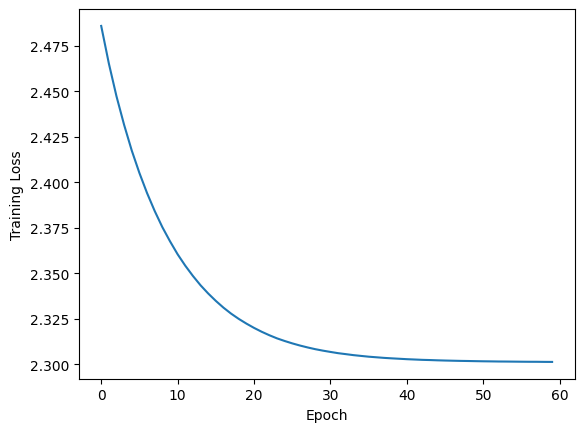

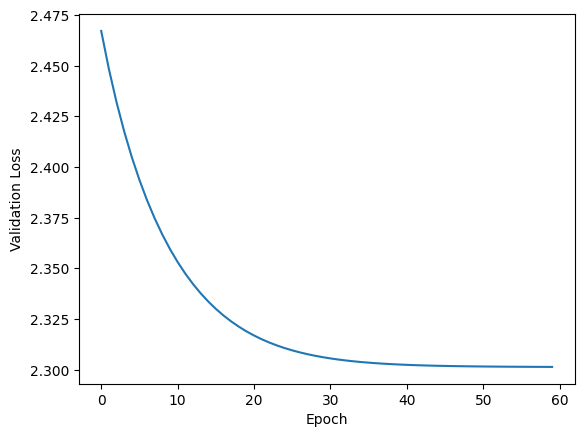

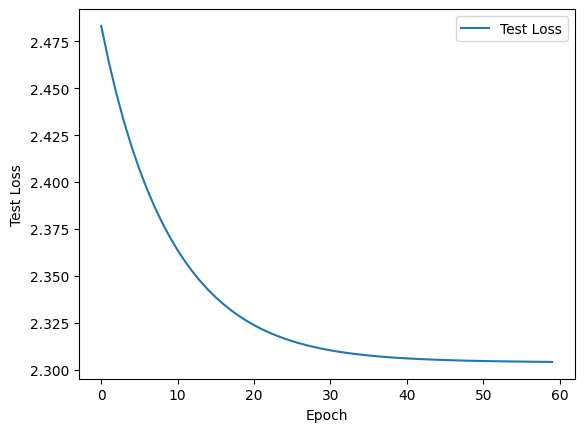

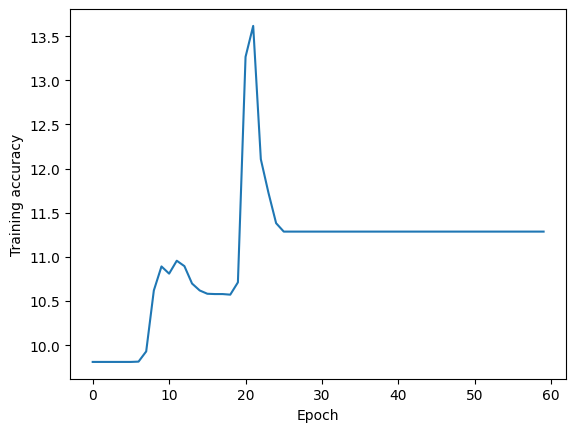

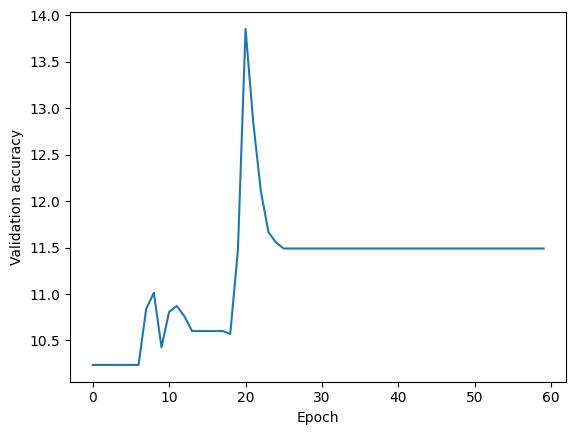

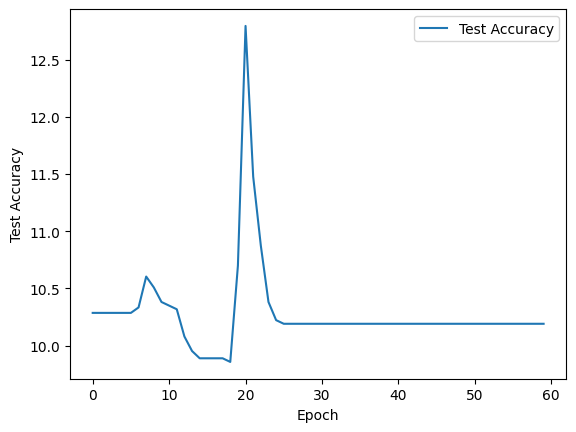

In [ ]:
#Q4-->Q2 with sigmoid Activation function
import torch,os
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import glob,cv2,math
import torch.nn.functional as F

class CustomDataset(Dataset):
    def __init__(self):
        self.imgs_path = "/content/MNIST_DATASET/MNIST_DATASET/trainingSet/trainingSet"
        file_list = glob.glob(os.path.join(self.imgs_path, "*", "*.jpg"))
        self.data = []
        for img_path in file_list:
            class_name = os.path.basename(os.path.dirname(img_path))
            self.data.append([img_path, int(class_name)])
        self.img_dim = (28, 28)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, class_id = self.data[idx]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.img_dim)
        img_tensor = torch.from_numpy(img).float()
        img_tensor = img_tensor.unsqueeze(0)
        class_id = torch.tensor(class_id, dtype=torch.long)
        return img_tensor, class_id
class FeedForwardNet(nn.Module):
    def __init__(self):
        super(FeedForwardNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 10)
        for layer in [self.fc1, self.fc2, self.fc3, self.fc4, self.fc5]:
            n = layer.weight.size(1)
            bound = math.sqrt(2 / n)
            nn.init.normal_(layer.weight, mean=0, std=bound)
            nn.init.zeros_(layer.bias)
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        x = F.sigmoid(self.fc4(x))
        x = self.fc5(x)
        return x

full_dataset = CustomDataset()
train_size = int(0.7 * len(full_dataset))  # Use 70% for training
test_val_size = len(full_dataset) - train_size
test_size = int(0.5 * test_val_size)  # Split the remaining 30% equally for test and validation
val_size = test_val_size - test_size

train_dataset, test_val_dataset = random_split(full_dataset, [train_size, test_val_size])
test_dataset, val_dataset = random_split(test_val_dataset, [test_size, val_size])

# Create DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
net = FeedForwardNet()

# Define the Cross-Entropy loss
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.0003)

epochs = 60
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
test_losses, test_accuracies = [], []

for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data in train_loader:
        inputs, labels = data
        inputs = inputs.float() / 255.0  # Normalize the input
        labels = labels.squeeze()  # Remove extra dimension from labels

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    # Validation loop
    net.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for data_val in val_loader:
            inputs_val, labels_val = data_val
            inputs_val = inputs_val.float() / 255.0  # Normalize the input
            labels_val = labels_val.squeeze()  # Remove extra dimension from labels

            outputs_val = net(inputs_val)
            loss_val = criterion(outputs_val, labels_val)
            val_loss += loss_val.item()
            _, predicted_val = torch.max(outputs_val.data, 1)
            total_val += labels_val.size(0)
            correct_val += (predicted_val == labels_val).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    # Test loop
    net.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data_test in test_loader:
            inputs_test, labels_test = data_test
            inputs_test = inputs_test.float() / 255.0
            labels_test = labels_test.squeeze()

            outputs_test = net(inputs_test)
            loss_test = criterion(outputs_test, labels_test)
            test_loss += loss_test.item()
            _, predicted_test = torch.max(outputs_test.data, 1)
            total_test += labels_test.size(0)
            correct_test += (predicted_test == labels_test).sum().item()

    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(100 * correct_test / total_test)

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.4f}')

plt.plot(range(epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.show()
plt.plot(range(epochs), train_accuracies, label='Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.show()
plt.plot(range(epochs), val_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')

plt.show()

plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()

Epoch 1, Train Loss: 2.6939, Train Acc: 17.5714, Val Loss: 2.1913, Val Acc: 26.1190, Test Loss: 2.1700, Test Acc: 25.8810
Epoch 2, Train Loss: 1.9321, Train Acc: 32.5268, Val Loss: 1.7315, Val Acc: 39.1190, Test Loss: 1.7182, Test Acc: 38.0714
Epoch 3, Train Loss: 1.5991, Train Acc: 43.6339, Val Loss: 1.4811, Val Acc: 49.3810, Test Loss: 1.4702, Test Acc: 48.8571
Epoch 4, Train Loss: 1.4038, Train Acc: 52.3571, Val Loss: 1.3262, Val Acc: 56.0000, Test Loss: 1.3150, Test Acc: 55.7619
Epoch 5, Train Loss: 1.2710, Train Acc: 57.9970, Val Loss: 1.2136, Val Acc: 60.5952, Test Loss: 1.2035, Test Acc: 60.8095
Epoch 6, Train Loss: 1.1704, Train Acc: 62.3601, Val Loss: 1.1268, Val Acc: 64.9048, Test Loss: 1.1161, Test Acc: 64.4286
Epoch 7, Train Loss: 1.0940, Train Acc: 65.6310, Val Loss: 1.0552, Val Acc: 67.2619, Test Loss: 1.0458, Test Acc: 66.7143
Epoch 8, Train Loss: 1.0312, Train Acc: 68.1845, Val Loss: 1.0032, Val Acc: 69.4762, Test Loss: 0.9911, Test Acc: 69.0714
Epoch 9, Train Loss: 0.9

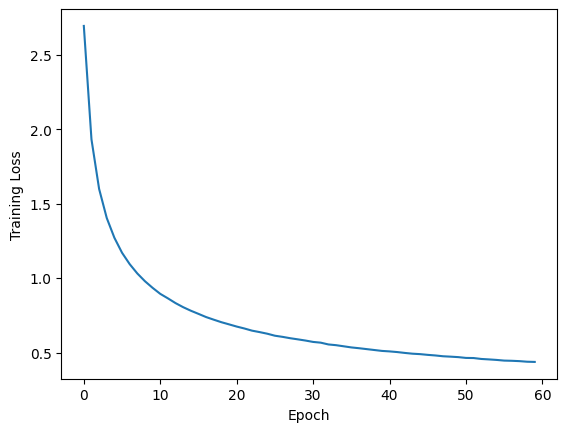

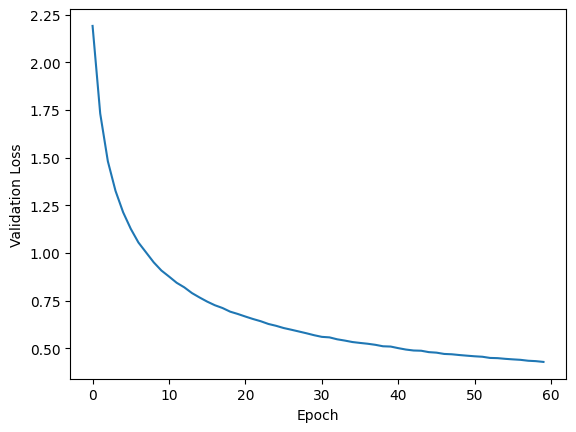

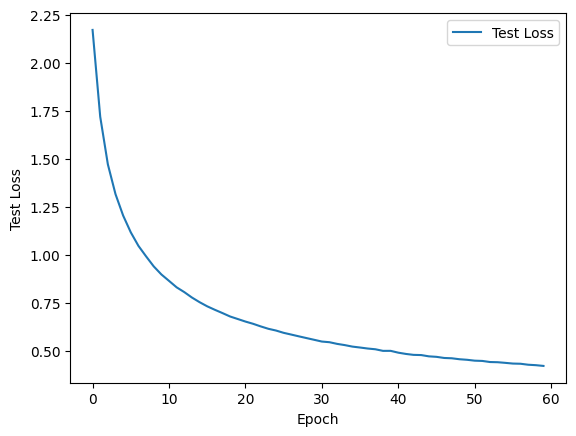

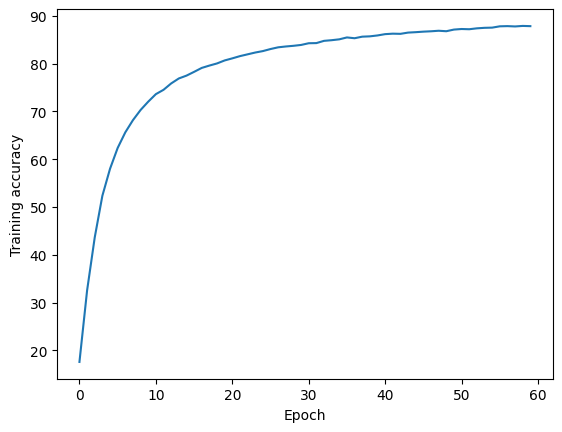

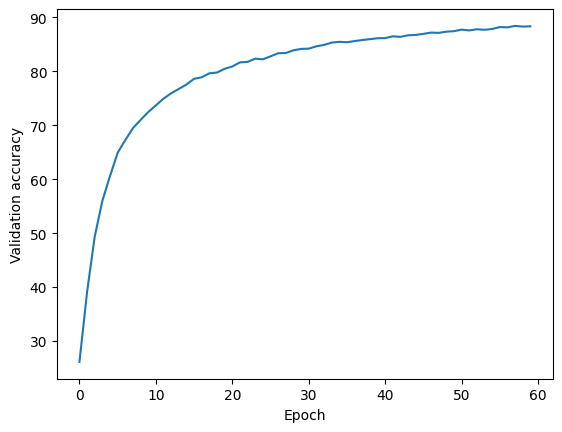

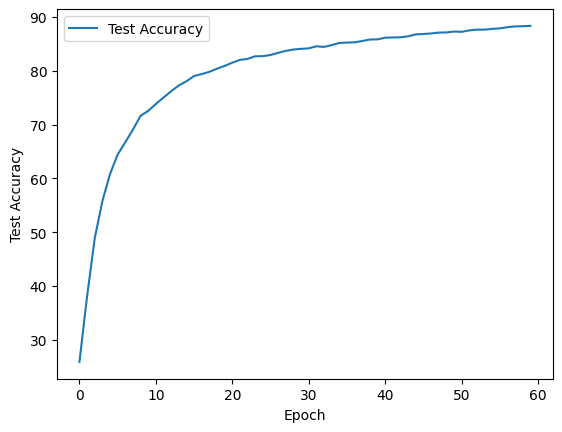

In [ ]:
#Q4-->Q2 with sigmoid activation function using batch normalization
import torch,os
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import glob,cv2,math
import torch.nn.functional as F

class CustomDataset(Dataset):
    def __init__(self):
        self.imgs_path = "/content/MNIST_DATASET/MNIST_DATASET/trainingSet/trainingSet"
        file_list = glob.glob(os.path.join(self.imgs_path, "*", "*.jpg"))
        self.data = []
        for img_path in file_list:
            class_name = os.path.basename(os.path.dirname(img_path))
            self.data.append([img_path, int(class_name)])
        self.img_dim = (28, 28)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, class_id = self.data[idx]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.img_dim)
        img_tensor = torch.from_numpy(img).float()  # Convert to float tensor
        img_tensor = img_tensor.unsqueeze(0)  # Normalize and add channel dimension
        class_id = torch.tensor(class_id, dtype=torch.long)  # Ensure the label is a long tensor
        return img_tensor, class_id
class FeedForwardNet(nn.Module):
    def __init__(self):
        super(FeedForwardNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.fc2 = nn.Linear(32, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.fc5 = nn.Linear(32, 10)

        for layer in [self.fc1, self.fc2, self.fc3, self.fc4, self.fc5]:
            n = layer.weight.size(1)
            bound = math.sqrt(2 / n)
            nn.init.normal_(layer.weight, mean=0, std=bound)
            nn.init.zeros_(layer.bias)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.bn1(F.sigmoid(self.fc1(x)))
        x = self.bn2(F.sigmoid(self.fc2(x)))
        x = self.bn3(F.sigmoid(self.fc3(x)))
        x = self.bn4(F.sigmoid(self.fc4(x)))
        x = self.fc5(x)
        return x


full_dataset = CustomDataset()
train_size = int(0.8 * len(full_dataset))  # Use 70% for training
test_val_size = len(full_dataset) - train_size
test_size = int(0.5 * test_val_size)  # Split the remaining 30% equally for test and validation
val_size = test_val_size - test_size

train_dataset, test_val_dataset = random_split(full_dataset, [train_size, test_val_size])
test_dataset, val_dataset = random_split(test_val_dataset, [test_size, val_size])

# Create DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
net = FeedForwardNet()


# Define the Cross-Entropy loss
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.0003)

epochs = 60
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
test_losses, test_accuracies = [], []

for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data in train_loader:
        inputs, labels = data
        inputs = inputs.float() / 255.0  # Normalize the input
        labels = labels.squeeze()  # Remove extra dimension from labels

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    # Validation loop
    net.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for data_val in val_loader:
            inputs_val, labels_val = data_val
            inputs_val = inputs_val.float() / 255.0  # Normalize the input
            labels_val = labels_val.squeeze()  # Remove extra dimension from labels

            outputs_val = net(inputs_val)
            loss_val = criterion(outputs_val, labels_val)
            val_loss += loss_val.item()
            _, predicted_val = torch.max(outputs_val.data, 1)
            total_val += labels_val.size(0)
            correct_val += (predicted_val == labels_val).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    # Test loop
    net.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data_test in test_loader:
            inputs_test, labels_test = data_test
            inputs_test = inputs_test.float() / 255.0
            labels_test = labels_test.squeeze()

            outputs_test = net(inputs_test)
            loss_test = criterion(outputs_test, labels_test)
            test_loss += loss_test.item()
            _, predicted_test = torch.max(outputs_test.data, 1)
            total_test += labels_test.size(0)
            correct_test += (predicted_test == labels_test).sum().item()

    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(100 * correct_test / total_test)

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.4f}')

plt.plot(range(epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.show()
plt.plot(range(epochs), train_accuracies, label='Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.show()
plt.plot(range(epochs), val_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')

plt.show()

plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()




Q3. Implement everything defined in Question 2 completely from scratch. Also implement the back-propagation
algorithm from scratch using only PyTorch tensor operations (calling PyTorch backward function will fetch you
0 marks). Train the scratch implemented model with the same settings (epochs, learning rate) as in Question
2 and generate graphs depicting the loss and accuracy for training, validation, and testing. Compare the
performance of your custom back-propagation algorithm with PyTorch’s implementation and provide a report
on the results.

In [ ]:
#Q3 with ReLU activation function
import torch
import torch.nn.functional as F
import math
import torch.nn as nn
import torch,os
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import glob,cv2,math
import torch.nn.functional as F

class CustomDataset(Dataset):
    def __init__(self):
        self.imgs_path = "/content/MNIST_DATASET/MNIST_DATASET/trainingSet/trainingSet"
        file_list = glob.glob(os.path.join(self.imgs_path, "*", "*.jpg"))
        self.data = []
        for img_path in file_list:
            class_name = os.path.basename(os.path.dirname(img_path))
            self.data.append([img_path, int(class_name)])
        self.img_dim = (28, 28)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, class_id = self.data[idx]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.img_dim)
        img_tensor = torch.from_numpy(img).float()  # Convert to float tensor
        img_tensor = img_tensor.unsqueeze(0)  # Normalize and add channel dimension
        class_id = torch.tensor(class_id, dtype=torch.long)  # Ensure the label is a long tensor
        return img_tensor, class_id
class DeepNeuralNetwork_Relu:
    def __init__(self):
        # Initialize weights and biases
        self.w1 = torch.randn(784, 32, requires_grad=False)
        self.b1 = torch.zeros(32, requires_grad=False)
        self.w2 = torch.randn(32, 32, requires_grad=False)
        self.b2 = torch.zeros(32, requires_grad=False)
        self.w3 = torch.randn(32, 32, requires_grad=False)
        self.b3 = torch.zeros(32, requires_grad=False)
        self.w4 = torch.randn(32, 32, requires_grad=False)
        self.b4 = torch.zeros(32, requires_grad=False)
        self.w5 = torch.randn(32, 10, requires_grad=False)
        self.b5 = torch.zeros(10, requires_grad=False)
        self._initialize_weights()

    def relu(self,x):
        return x.clamp(min=0)

    def softmax(self,x):
        e_x = torch.exp(x - torch.max(x))
        return e_x / e_x.sum(dim=1, keepdim=True)

    def _initialize_weights(self):
        for weight, bias in [(self.w1, self.b1), (self.w2, self.b2),
                             (self.w3, self.b3), (self.w4, self.b4),
                             (self.w5, self.b5)]:
            n = weight.size(1)  # Number of input units
            bound = math.sqrt(2 / n)  # Calculate standard deviation for normal distribution
            nn.init.normal_(weight, mean=0, std=bound)
            nn.init.zeros_(bias)
    def forward(self, x):
        # Forward pass for each layer
        self.a1 = x @ self.w1 + self.b1
        self.h1 = self.relu(self.a1)

        self.a2 = self.h1 @ self.w2 + self.b2
        self.h2 = self.relu(self.a2)

        self.a3 = self.h2 @ self.w3 + self.b3
        self.h3 = self.relu(self.a3)

        self.a4 = self.h3 @ self.w4 + self.b4
        self.h4 = self.relu(self.a4)

        self.a5 = self.h4 @ self.w5 + self.b5
        self.y_pred = self.softmax(self.a5)

        return self.y_pred

    def compute_loss(self, y_pred, y_true):
        eps = 1e-6
        return -torch.sum(y_true * torch.log(y_pred+eps)) / y_true.shape[0]

    def backward(self, x, y_true, y_pred, learning_rate):
        # Output layer
        d_a5 = y_pred - y_true
        d_w5 = self.h4.t() @ d_a5
        d_b5 = d_a5.sum(0)

        # Layer 4
        d_h4 = d_a5 @ self.w5.t()
        d_h4[self.a4 <= 0] = 0  # ReLU derivative
        d_w4 = self.h3.t() @ d_h4
        d_b4 = d_h4.sum(0)

        # Layer 3
        d_h3 = d_h4 @ self.w4.t()
        d_h3[self.a3 <= 0] = 0  # ReLU derivative
        d_w3 = self.h2.t() @ d_h3
        d_b3 = d_h3.sum(0)

        # Layer 2
        d_h2 = d_h3 @ self.w3.t()
        d_h2[self.a2 <= 0] = 0  # ReLU derivative
        d_w2 = self.h1.t() @ d_h2
        d_b2 = d_h2.sum(0)

        # Layer 1
        d_h1 = d_h2 @ self.w2.t()
        d_h1[self.a1 <= 0] = 0  # ReLU derivative
        d_w1 = x.t() @ d_h1
        d_b1 = d_h1.sum(0)

        # Update weights and biases
        with torch.no_grad():
            self.w1 -= learning_rate * d_w1
            self.b1 -= learning_rate * d_b1
            self.w2 -= learning_rate * d_w2
            self.b2 -= learning_rate * d_b2
            self.w3 -= learning_rate * d_w3
            self.b3 -= learning_rate * d_b3
            self.w4 -= learning_rate * d_w4
            self.b4 -= learning_rate * d_b4
            self.w5 -= learning_rate * d_w5
            self.b5 -= learning_rate * d_b5

            # Zero gradients (manually, since we're not using autograd)
            self.zero_gradients()

    def zero_gradients(self):
        # Manually zero the gradients
        for param in [self.w1, self.b1, self.w2, self.b2, self.w3, self.b3, self.w4, self.b4, self.w5, self.b5]:
            if param.grad is not None:
                param.grad.zero_()



Epoch 1, Train Loss: 1.1947, Train Acc: 61.6586, Val Loss: 0.6945, Val Acc: 78.0035, Test Loss: 0.6961, Test Acc: 77.5079
Epoch 2, Train Loss: 0.6151, Train Acc: 80.6150, Val Loss: 0.5402, Val Acc: 83.0503, Test Loss: 0.5438, Test Acc: 83.2857
Epoch 3, Train Loss: 0.4836, Train Acc: 84.9961, Val Loss: 0.4581, Val Acc: 85.7007, Test Loss: 0.4537, Test Acc: 85.7143
Epoch 4, Train Loss: 0.4124, Train Acc: 87.2309, Val Loss: 0.3881, Val Acc: 88.1447, Test Loss: 0.3915, Test Acc: 88.2698
Epoch 5, Train Loss: 0.3677, Train Acc: 88.8125, Val Loss: 0.3630, Val Acc: 88.8272, Test Loss: 0.3716, Test Acc: 88.1746
Epoch 6, Train Loss: 0.3329, Train Acc: 89.8330, Val Loss: 0.3389, Val Acc: 89.6048, Test Loss: 0.3459, Test Acc: 89.2857
Epoch 7, Train Loss: 0.3066, Train Acc: 90.6732, Val Loss: 0.3161, Val Acc: 90.4460, Test Loss: 0.3232, Test Acc: 90.2698
Epoch 8, Train Loss: 0.2875, Train Acc: 91.2990, Val Loss: 0.3062, Val Acc: 90.4460, Test Loss: 0.3112, Test Acc: 90.3968
Epoch 9, Train Loss: 0.2

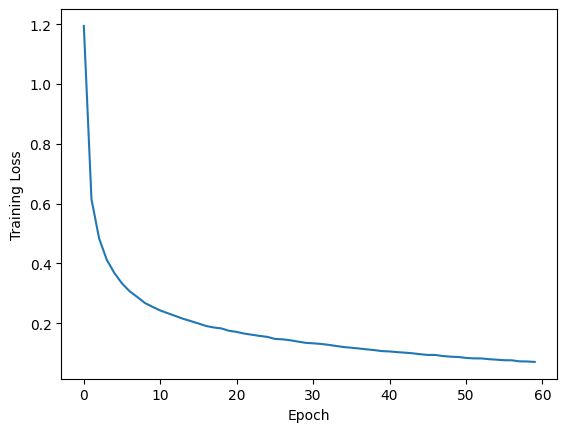

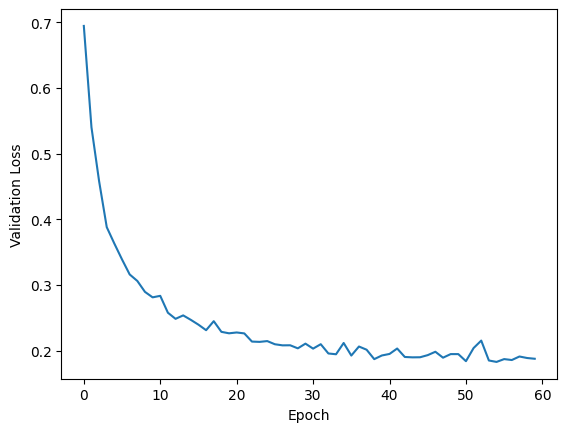

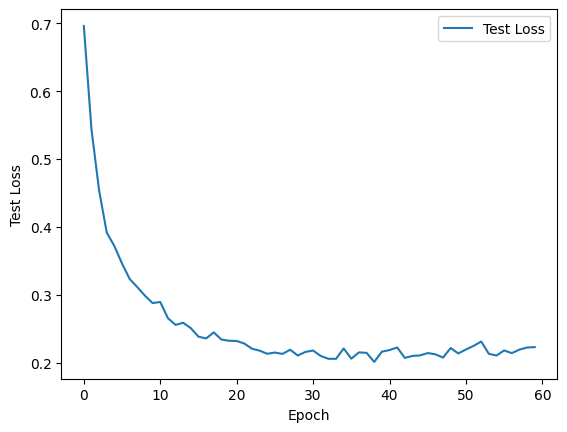

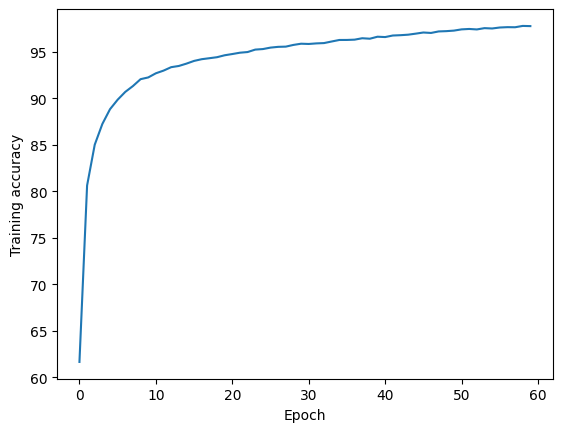

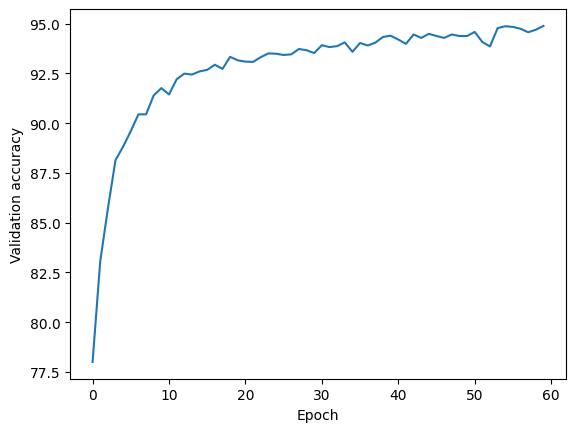

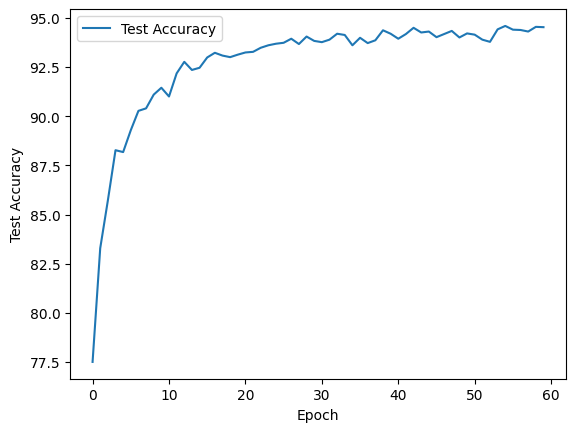

In [ ]:
full_dataset = CustomDataset()
train_size = int(0.7 * len(full_dataset))  # Use 70% for training
test_val_size = len(full_dataset) - train_size
test_size = int(0.5 * test_val_size)  # Split the remaining 30% equally for test and validation
val_size = test_val_size - test_size

train_dataset, test_val_dataset = random_split(full_dataset, [train_size, test_val_size])
test_dataset, val_dataset = random_split(test_val_dataset, [test_size, val_size])

# Create DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

model = DeepNeuralNetwork_Relu()
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
test_losses, test_accuracies = [], []
# Training loop
epochs = 60
learning_rate = 0.0003
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for data in train_loader:
        inputs, labels = data
        inputs = inputs.float() / 255.0  # Normalize the input
        inputs = inputs.view(-1,784)
        labels = labels.squeeze()  # Remove extra dimension from labels
        # print(inputs.shape)
        y_train_one_hot = F.one_hot(labels, num_classes=10).float()

        y_pred = model.forward(inputs)
        loss = model.compute_loss(y_pred, y_train_one_hot)
        model.backward(inputs, y_train_one_hot, y_pred, learning_rate)

        y_pred = torch.argmax(y_pred, dim=1)
        running_loss += loss
        # _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        # print(y_pred.shape)
        correct += (y_pred == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in val_loader:
            inputs = inputs.float() / 255.0
            inputs = inputs.view(-1, 784)
            labels = labels.squeeze()
            y_val_one_hot = F.one_hot(labels, num_classes=10).float()

            y_pred = model.forward(inputs)
            loss = model.compute_loss(y_pred, y_val_one_hot)

            y_pred = torch.argmax(y_pred, dim=1)
            val_running_loss += loss
            val_total += labels.size(0)
            val_correct += (y_pred == labels).sum().item()

    # Calculate validation loss and accuracy
    val_losses.append(val_running_loss / len(val_loader))
    val_accuracies.append(100 * val_correct / val_total)

    test_running_loss = 0.0
    test_correct = 0
    test_total = 0
    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in test_loader:
            inputs = inputs.float() / 255.0
            inputs = inputs.view(-1, 784)
            labels = labels.squeeze()
            y_test_one_hot = F.one_hot(labels, num_classes=10).float()

            y_pred = model.forward(inputs)
            loss = model.compute_loss(y_pred, y_test_one_hot)

            y_pred = torch.argmax(y_pred, dim=1)
            test_running_loss += loss
            test_total += labels.size(0)
            test_correct += (y_pred == labels).sum().item()

    test_losses.append(test_running_loss / len(test_loader))
    test_accuracies.append(100 * test_correct / test_total)

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.4f}')

plt.plot(range(epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.show()
plt.plot(range(epochs), train_accuracies, label='Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.show()
plt.plot(range(epochs), val_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')

plt.show()

plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()


In [ ]:
#Q4-->Q3 with sigmoid activation function
import torch
import torch.nn.functional as F

class DeepNeuralNetwork_sigmoid:
    def __init__(self):
        # Initialize weights and biases
        self.w1 = torch.randn(784, 32, requires_grad=False)
        self.b1 = torch.zeros(32, requires_grad=False)
        self.w2 = torch.randn(32, 32, requires_grad=False)
        self.b2 = torch.zeros(32, requires_grad=False)
        self.w3 = torch.randn(32, 32, requires_grad=False)
        self.b3 = torch.zeros(32, requires_grad=False)
        self.w4 = torch.randn(32, 32, requires_grad=False)
        self.b4 = torch.zeros(32, requires_grad=False)
        self.w5 = torch.randn(32, 10, requires_grad=False)
        self.b5 = torch.zeros(10, requires_grad=False)

    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def softmax(self,x):
        e_x = torch.exp(x - torch.max(x))
        return e_x / e_x.sum(dim=1, keepdim=True)

    def forward(self, x):
        # Forward pass using sigmoid activation function
        self.a1 = x @ self.w1 + self.b1
        self.h1 = self.sigmoid(self.a1)

        self.a2 = self.h1 @ self.w2 + self.b2
        self.h2 = self.sigmoid(self.a2)

        self.a3 = self.h2 @ self.w3 + self.b3
        self.h3 = self.sigmoid(self.a3)

        self.a4 = self.h3 @ self.w4 + self.b4
        self.h4 = self.sigmoid(self.a4)

        self.a5 = self.h4 @ self.w5 + self.b5
        self.y_pred = self.softmax(self.a5)
        return self.y_pred

    def compute_loss(self, y_pred, y_true):
        # Compute cross-entropy loss
        eps = 1e-6
        return -torch.sum(y_true * torch.log(y_pred+eps)) / y_true.shape[0]

    def backward(self, x, y_true, y_pred, learning_rate):
        # Backward pass and gradient update
        d_a5 = y_pred - y_true
        d_w5 = self.h4.t() @ d_a5
        d_b5 = d_a5.sum(0)

        d_h4 = d_a5 @ self.w5.t()
        d_a4 = d_h4 * self.sigmoid_derivative(self.a4)
        d_w4 = self.h3.t() @ d_a4
        d_b4 = d_a4.sum(0)

        d_h3 = d_a4 @ self.w4.t()
        d_a3 = d_h3 * self.sigmoid_derivative(self.a3)
        d_w3 = self.h2.t() @ d_a3
        d_b3 = d_a3.sum(0)

        d_h2 = d_a3 @ self.w3.t()
        d_a2 = d_h2 * self.sigmoid_derivative(self.a2)
        d_w2 = self.h1.t() @ d_a2
        d_b2 = d_a2.sum(0)

        d_h1 = d_a2 @ self.w2.t()
        d_a1 = d_h1 * self.sigmoid_derivative(self.a1)
        d_w1 = x.t() @ d_a1
        d_b1 = d_a1.sum(0)

        # Update weights and biases
        with torch.no_grad():
            self.w1 -= learning_rate * d_w1
            self.b1 -= learning_rate * d_b1
            self.w2 -= learning_rate * d_w2
            self.b2 -= learning_rate * d_b2
            self.w3 -= learning_rate * d_w3
            self.b3 -= learning_rate * d_b3
            self.w4 -= learning_rate * d_w4
            self.b4 -= learning_rate * d_b4
            self.w5 -= learning_rate * d_w5
            self.b5 -= learning_rate * d_b5

            # Zero gradients (manually, since we're not using autograd)
            self.zero_gradients()

    def zero_gradients(self):
        # Reset gradients to zero
        for param in [self.w1, self.b1, self.w2, self.b2, self.w3, self.b3, self.w4, self.b4, self.w5, self.b5]:
            if param.grad is not None:
                param.grad.zero_()

Epoch 1, Train Loss: 2.4515, Train Acc: 19.2762, Val Loss: 2.0791, Val Acc: 26.2657, Test Loss: 2.0667, Test Acc: 27.4444
Epoch 2, Train Loss: 1.9909, Train Acc: 29.9704, Val Loss: 1.9220, Val Acc: 33.2963, Test Loss: 1.9112, Test Acc: 33.4762
Epoch 3, Train Loss: 1.8629, Train Acc: 35.3039, Val Loss: 1.8164, Val Acc: 37.4068, Test Loss: 1.8058, Test Acc: 38.0159
Epoch 4, Train Loss: 1.7636, Train Acc: 39.7905, Val Loss: 1.7264, Val Acc: 40.8507, Test Loss: 1.7176, Test Acc: 41.7619
Epoch 5, Train Loss: 1.6729, Train Acc: 43.8484, Val Loss: 1.6374, Val Acc: 45.1040, Test Loss: 1.6291, Test Acc: 46.3016
Epoch 6, Train Loss: 1.5851, Train Acc: 47.8826, Val Loss: 1.5542, Val Acc: 49.0081, Test Loss: 1.5445, Test Acc: 50.3492
Epoch 7, Train Loss: 1.4991, Train Acc: 51.2773, Val Loss: 1.4705, Val Acc: 51.6743, Test Loss: 1.4624, Test Acc: 52.7778
Epoch 8, Train Loss: 1.4148, Train Acc: 54.6855, Val Loss: 1.3890, Val Acc: 55.3880, Test Loss: 1.3777, Test Acc: 55.9524
Epoch 9, Train Loss: 1.3

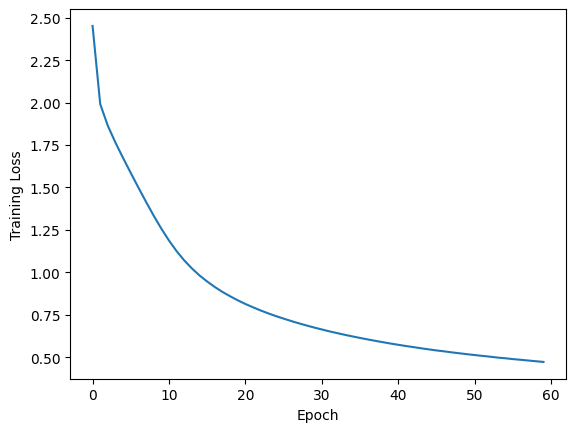

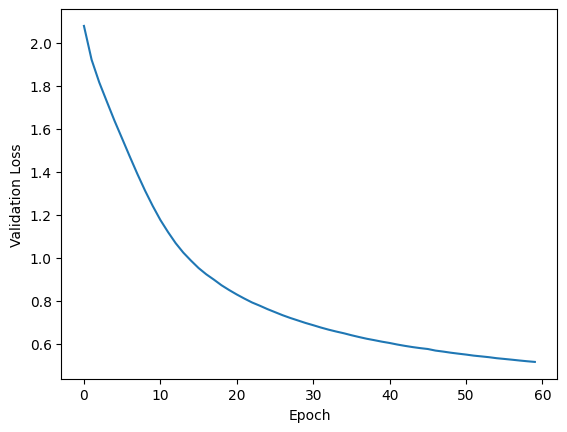

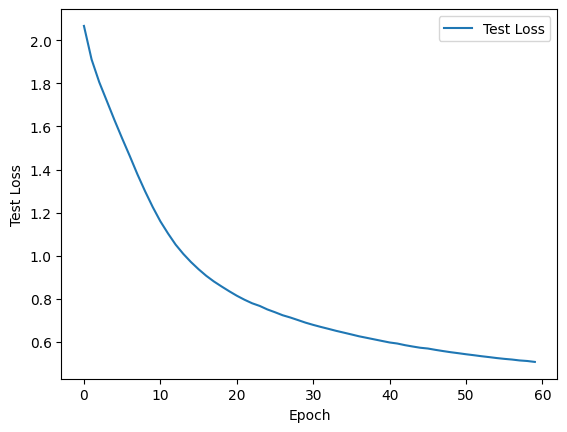

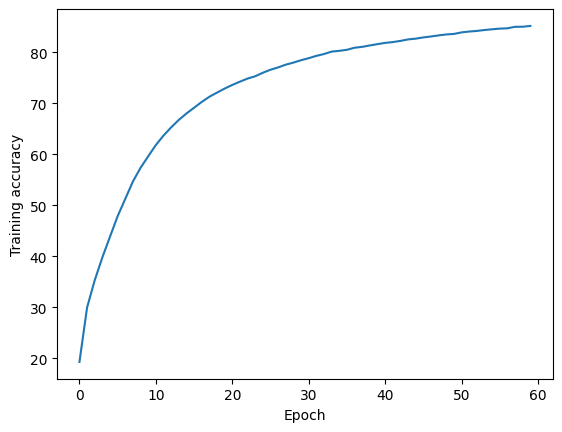

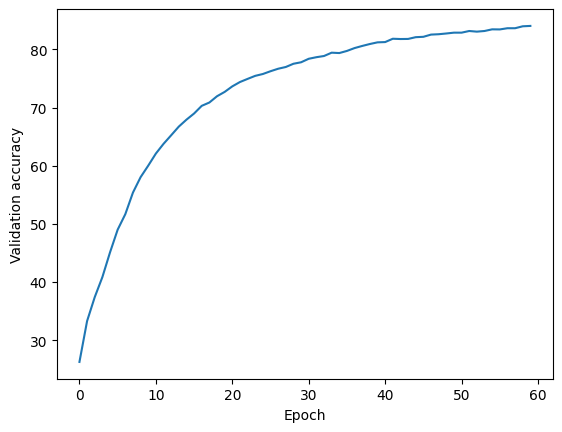

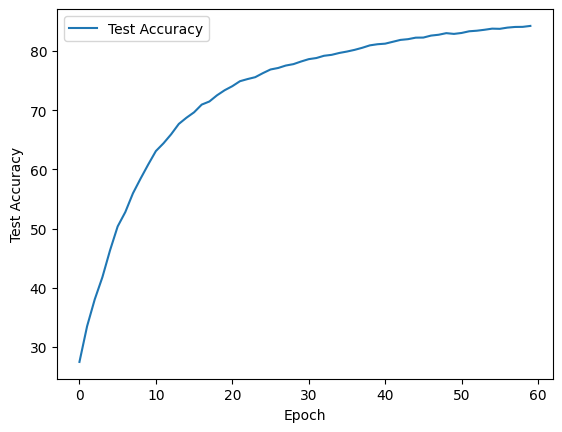

In [ ]:
full_dataset = CustomDataset()
train_size = int(0.7 * len(full_dataset))  # Use 70% for training
test_val_size = len(full_dataset) - train_size
test_size = int(0.5 * test_val_size)  # Split the remaining 30% equally for test and validation
val_size = test_val_size - test_size

train_dataset, test_val_dataset = random_split(full_dataset, [train_size, test_val_size])
test_dataset, val_dataset = random_split(test_val_dataset, [test_size, val_size])

# Create DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

model = DeepNeuralNetwork_sigmoid()
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
test_losses, test_accuracies = [], []
# Training loop
epochs = 60
learning_rate = 0.0003
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for data in train_loader:
        inputs, labels = data
        inputs = inputs.float() / 255.0  # Normalize the input
        inputs = inputs.view(-1,784)
        labels = labels.squeeze()  # Remove extra dimension from labels
        # print(inputs.shape)
        y_train_one_hot = F.one_hot(labels, num_classes=10).float()

        y_pred = model.forward(inputs)
        loss = model.compute_loss(y_pred, y_train_one_hot)
        model.backward(inputs, y_train_one_hot, y_pred, learning_rate)

        y_pred = torch.argmax(y_pred, dim=1)
        running_loss += loss
        # _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        # print(y_pred.shape)
        correct += (y_pred == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in val_loader:
            inputs = inputs.float() / 255.0
            inputs = inputs.view(-1, 784)
            labels = labels.squeeze()
            y_val_one_hot = F.one_hot(labels, num_classes=10).float()

            y_pred = model.forward(inputs)
            loss = model.compute_loss(y_pred, y_val_one_hot)

            y_pred = torch.argmax(y_pred, dim=1)
            val_running_loss += loss
            val_total += labels.size(0)
            val_correct += (y_pred == labels).sum().item()

    # Calculate validation loss and accuracy
    val_losses.append(val_running_loss / len(val_loader))
    val_accuracies.append(100 * val_correct / val_total)

    test_running_loss = 0.0
    test_correct = 0
    test_total = 0
    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in test_loader:
            inputs = inputs.float() / 255.0
            inputs = inputs.view(-1, 784)
            labels = labels.squeeze()
            y_test_one_hot = F.one_hot(labels, num_classes=10).float()

            y_pred = model.forward(inputs)
            loss = model.compute_loss(y_pred, y_test_one_hot)

            y_pred = torch.argmax(y_pred, dim=1)
            test_running_loss += loss
            test_total += labels.size(0)
            test_correct += (y_pred == labels).sum().item()

    test_losses.append(test_running_loss / len(test_loader))
    test_accuracies.append(100 * test_correct / test_total)

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.4f}')

    # print(f'Epoch {epoch + 1}, TraiLoss: {running_loss.item()}, Accuracy: {train_accuracies[-1]}')
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.show()
plt.plot(range(epochs), train_accuracies, label='Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.show()
plt.plot(range(epochs), val_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')

plt.show()

plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()


Epoch 1, Train Loss: 2.3005, Train Acc: 10.4153, Val Loss: 2.2991, Val Acc: 9.6334, Test Loss: 2.2980, Test Acc: 10.8730
Epoch 2, Train Loss: 2.2929, Train Acc: 10.9596, Val Loss: 2.2884, Val Acc: 13.5375, Test Loss: 2.2868, Test Acc: 14.3333
Epoch 3, Train Loss: 2.2709, Train Acc: 15.2964, Val Loss: 2.2502, Val Acc: 17.6004, Test Loss: 2.2476, Test Acc: 18.2381
Epoch 4, Train Loss: 2.1796, Train Acc: 20.9157, Val Loss: 2.0899, Val Acc: 26.5196, Test Loss: 2.0836, Test Acc: 26.7778
Epoch 5, Train Loss: 1.9705, Train Acc: 30.2595, Val Loss: 1.7397, Val Acc: 38.2320, Test Loss: 1.7296, Test Acc: 37.9841
Epoch 6, Train Loss: 1.7133, Train Acc: 38.1510, Val Loss: 1.4974, Val Acc: 45.8975, Test Loss: 1.4883, Test Acc: 45.7302
Epoch 7, Train Loss: 1.5919, Train Acc: 42.5967, Val Loss: 1.4651, Val Acc: 48.9605, Test Loss: 1.4467, Test Acc: 49.0159
Epoch 8, Train Loss: 1.2354, Train Acc: 56.4849, Val Loss: 1.1057, Val Acc: 63.1963, Test Loss: 1.0876, Test Acc: 65.1111
Epoch 9, Train Loss: 1.06

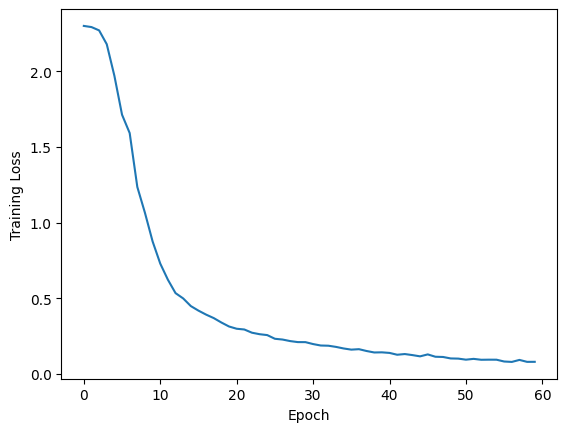

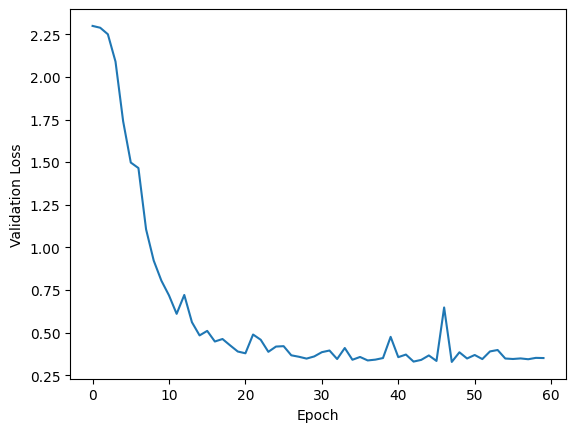

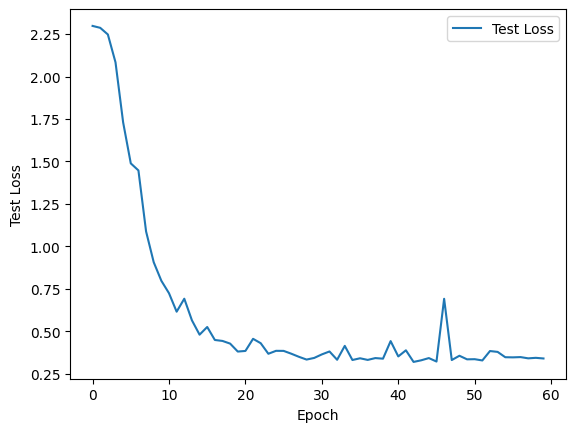

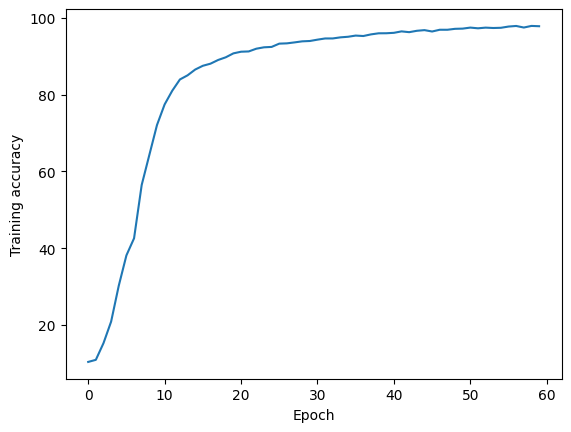

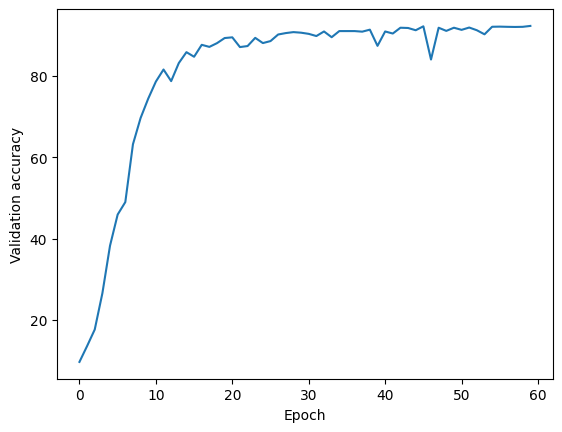

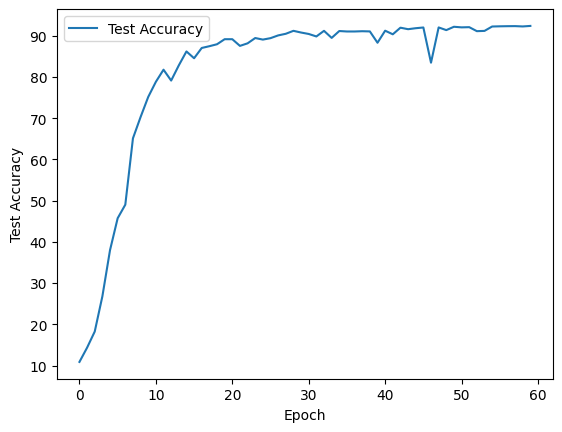

In [ ]:
#Bonus Q1
import torch,os
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import glob,cv2,math
import torch.nn.functional as F

class CustomDataset(Dataset):
    def __init__(self):
        self.imgs_path = "/content/MNIST_DATASET/MNIST_DATASET/trainingSet/trainingSet"
        file_list = glob.glob(os.path.join(self.imgs_path, "*", "*.jpg"))
        self.data = []
        for img_path in file_list:
            class_name = os.path.basename(os.path.dirname(img_path))
            self.data.append([img_path, int(class_name)])
        self.img_dim = (28, 28)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, class_id = self.data[idx]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.img_dim)
        img_tensor = torch.from_numpy(img).float()  # Convert to float tensor
        img_tensor = img_tensor.unsqueeze(0)  # Normalize and add channel dimension
        class_id = torch.tensor(class_id, dtype=torch.long)  # Ensure the label is a long tensor
        return img_tensor, class_id
class DynamicFeedForwardNet(nn.Module):
    def __init__(self, hidden_layers=1, hidden_size=400):
        super(DynamicFeedForwardNet, self).__init__()
        self.hidden_layers = nn.ModuleList()
        input_size = 28*28

        # Add the hidden layers
        for i in range(hidden_layers):
            self.hidden_layers.append(nn.Linear(input_size if i == 0 else hidden_size, hidden_size))
            nn.init.kaiming_normal_(self.hidden_layers[-1].weight)
            nn.init.zeros_(self.hidden_layers[-1].bias)

        # Output layer
        self.output = nn.Linear(hidden_size, 10)  # Assuming 10 classes for MNIST

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image

        for layer in self.hidden_layers:
            x = F.relu(layer(x))

        x = self.output(x)
        return x


full_dataset = CustomDataset()
train_size = int(0.7 * len(full_dataset))  # Use 70% for training
test_val_size = len(full_dataset) - train_size
test_size = int(0.5 * test_val_size)  # Split the remaining 30% equally for test and validation
val_size = test_val_size - test_size

train_dataset, test_val_dataset = random_split(full_dataset, [train_size, test_val_size])
test_dataset, val_dataset = random_split(test_val_dataset, [test_size, val_size])

# Create DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
hidden_layer_count = 69  # Example: 3 hidden layers
net = DynamicFeedForwardNet(hidden_layers=hidden_layer_count)

criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.0003)

epochs = 60
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
test_losses, test_accuracies = [], []

for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data in train_loader:
        inputs, labels = data
        inputs = inputs.float() / 255.0  # Normalize the input
        labels = labels.squeeze()  # Remove extra dimension from labels

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    # Validation loop
    net.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for data_val in val_loader:
            inputs_val, labels_val = data_val
            inputs_val = inputs_val.float() / 255.0  # Normalize the input
            labels_val = labels_val.squeeze()  # Remove extra dimension from labels

            outputs_val = net(inputs_val)
            loss_val = criterion(outputs_val, labels_val)
            val_loss += loss_val.item()
            _, predicted_val = torch.max(outputs_val.data, 1)
            total_val += labels_val.size(0)
            correct_val += (predicted_val == labels_val).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)

    # Test loop
    net.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data_test in test_loader:
            inputs_test, labels_test = data_test
            inputs_test = inputs_test.float() / 255.0
            labels_test = labels_test.squeeze()

            outputs_test = net(inputs_test)
            loss_test = criterion(outputs_test, labels_test)
            test_loss += loss_test.item()
            _, predicted_test = torch.max(outputs_test.data, 1)
            total_test += labels_test.size(0)
            correct_test += (predicted_test == labels_test).sum().item()

    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(100 * correct_test / total_test)

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Acc: {test_accuracies[-1]:.4f}')
    # torch.save(net.state_dict(), saving_path)

plt.plot(range(epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.show()
plt.plot(range(epochs), train_accuracies, label='Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.show()
plt.plot(range(epochs), val_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')

plt.show()

plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()

In [ ]:
#Bonus Q2
import time


custom_dataset = CustomDataset()
train_loader = DataLoader(custom_dataset, batch_size=128, shuffle=True)

# Initialize the model
model = DeepNeuralNetwork_Relu()
Train_losses=[]
Train_accuracies=[]
# Train the model
epochs = 60
ime=[]
learning_rate = 0.0003
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()
    for data in train_loader:
        inputs, labels = data
        inputs = inputs.float() / 255.0  # Normalize the input
        inputs = inputs.view(-1,784)
        labels = labels.squeeze()  # Remove extra dimension from labels
        # print(inputs.shape)
        y_train_one_hot = F.one_hot(labels, num_classes=10).float()

        y_pred = model.forward(inputs)
        loss = model.compute_loss(y_pred, y_train_one_hot)
        model.backward(inputs, y_train_one_hot, y_pred, learning_rate)

        y_pred = torch.argmax(y_pred, dim=1)
        running_loss += loss
        # _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        # print(y_pred.shape)
        correct += (y_pred == labels).sum().item()

    end_time = time.time()
    ime.append(end_time-start_time)
    print(ime[-1])
    # Train_losses.append(running_loss / len(train_loader))
    # Train_accuracies.append(100 * correct / total)
    # print(f'Epoch {epoch+1}/{epochs}: Training loss: {Train_losses[-1]:.4f} Training Accuracy: {Train_accuracies[-1]:.4f}')

training_time = end_time-start_time

print(f'Total training time : {sum(ime)}')

4.029224395751953
4.01602029800415
5.010733604431152
3.9372518062591553
3.951328992843628
5.082732677459717
3.9226672649383545
3.9682464599609375
4.989434003829956
3.9744951725006104
3.983921766281128
5.017597436904907
3.945643424987793
3.8965983390808105
4.886530637741089
4.139951944351196
3.9624006748199463
4.617180824279785
4.787795066833496
3.9439656734466553
4.541028738021851
4.41666316986084
3.9411940574645996
5.766594648361206
4.277538299560547
3.9715216159820557
4.583185434341431
4.519910573959351
3.9608519077301025
4.2988409996032715
4.675896406173706
3.9957215785980225
4.09664249420166
4.864840030670166
4.004289150238037
3.9161972999572754
5.057840347290039
4.003082275390625
3.9568734169006348
5.092426300048828
4.084022760391235
4.148534774780273
5.8663763999938965
4.132872104644775
4.0776708126068115
5.1722962856292725
4.085985898971558
4.036604881286621
5.199290752410889
3.992576837539673
4.004802942276001
5.119346857070923
3.9762463569641113
4.046224594116211
5.13551568984

Report:
Scratch Implementation of back propagation:
best training accuracy: 98%
best validation accuracy : 92-94%
best test accuracy : 92-94%

Pytorch implementation:
best training accuracy : 83%
best validation accuracy : 82%
best test accuracy : 82%

Overall here scratch implementation is performing better than pytorch implementation and curves for scratch implementation are more smoother than pytorch's implementation, basically loss is more consistently decreasing in case of scratch implementation.

As per my interpretaion Pytorch's implementation may be hanling much more cases than my scratch implementation.

My custom back propagation handles all calculations from scratch.

Accuracy with sigmoid activation functoin is considerably low due to vanishing gradient problem---> can be solved using batch normalization.

I have also used kaiming weight initialization--> It sets the variance of the weights to 2/n instead of 1/n. This approach is more suitable for rectified linear units (ReLU) because it prevents the gradients from vanishing during the training process.